# Bidirectional RNNs (BRNN):

Sentiment Analysis is the process of determining whether a piece of text is positive, negative, or neutral. It is widely used in social media monitoring, customer feedback and support, identification of derogatory tweets, product analysis, etc.

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=d0098cb88570a3c019cb4fb0a90c13a6108469046734e5dd8399d6a80220f997
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
#importing the sentiment-140
import wget
wget.download("https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/sentiment-analysis-is-bad/data/sentiment140-subset.csv.zip")
!unzip -n sentiment140-subset.csv.zip
#Importing pandas
import pandas as pd

Archive:  sentiment140-subset.csv.zip
  inflating: sentiment140-subset.csv  


In [3]:
#loading the dataset
data = pd.read_csv('sentiment140-subset.csv', nrows=50000)

In [4]:
#Reading the dataset
data.columns

Index(['polarity', 'text'], dtype='object')

In [36]:
#Finding the total number of rows in the dataset
print(len(data))
data.head(15)

50000


,polarity,text
0,0,@kconsidder You never tweet
1,0,Sick today coding from the couch.
2,1,"@ChargerJenn Thx for answering so quick,I was ..."
3,1,Wii fit says I've lost 10 pounds since last ti...
4,0,@MrKinetik Not a thing!!! I don't really have...
5,1,and its pretty cool I never thought I would e...
6,0,finallly! twitter wouldnt let me in! x
7,1,"Just took a shower, i feel so refreshed now"
8,0,Love the show! You and Jasmine got me watching...
9,1,I have a story to tell you... its my birthday ...


In [6]:
#Preprocessing the data
import re
import tensorflow as tf

max_features = 4000

In [7]:
#Fit tokensiser into text
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)

In [8]:
#Use the resultant tokenizer to tokenize the text
X = tokenizer.texts_to_sequences(data['text'].values)

In [9]:
#Pad the tokenised sequence to maintain the length across the sequences
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [10]:
#print the shape of the vector
X.shape

(50000, 35)

In [12]:
#Creating the model
embed_dim = 256
lstm_out = 196

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.4))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

* An embedding layer is the input layer that maps the words/tokenizers to a vector with embed_dim dimensions.

* The spatial dropout layer is to drop the nodes so as to prevent overfitting. 0.4 indicates the probability with which the nodes have to be dropped.

* The bidirectional layer is an RNN-LSTM layer with a size lstm_out.

* The dense is an output layer with 2 nodes (indicating positive and negative) and softmax activation function. Softmax helps in determining the probability of inclination of a text towards either positivity or negativity

In [13]:
#print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 35, 256)           1024000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 35, 256)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 392)              710304    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 2)                 786       
                                                                 
Total params: 1,735,090
Trainable params: 1,735,090
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Initialise the train data and test data
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
#One hot encode the output labels
Y = pd.get_dummies(data['polarity'])

In [16]:
#Map the resultant 0/1 with Pos/Neg
result_dict = {0: 'Negative', 1: 'Positive'}
y_arr = np.vectorize(result_dict.get)(Y.columns)

In [17]:
#Fetching the output labels
Y = Y.values

In [18]:
#Splitting train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [19]:
#print the shape of train and test sets
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(33500, 35) (33500, 2)
(16500, 35) (16500, 2)


In [22]:
##Training the model
#fitting the model
history = model.fit(X_train, Y_train, epochs=20 , batch_size=100, verbose=2)

Epoch 1/20
335/335 - 40s - loss: 0.0859 - accuracy: 0.9663 - 40s/epoch - 120ms/step
Epoch 2/20
335/335 - 41s - loss: 0.0785 - accuracy: 0.9695 - 41s/epoch - 121ms/step
Epoch 3/20
335/335 - 40s - loss: 0.0745 - accuracy: 0.9704 - 40s/epoch - 121ms/step
Epoch 4/20
335/335 - 41s - loss: 0.0683 - accuracy: 0.9740 - 41s/epoch - 121ms/step
Epoch 5/20
335/335 - 40s - loss: 0.0644 - accuracy: 0.9741 - 40s/epoch - 118ms/step
Epoch 6/20
335/335 - 40s - loss: 0.0654 - accuracy: 0.9733 - 40s/epoch - 119ms/step
Epoch 7/20
335/335 - 39s - loss: 0.0626 - accuracy: 0.9753 - 39s/epoch - 117ms/step
Epoch 8/20
335/335 - 40s - loss: 0.0557 - accuracy: 0.9780 - 40s/epoch - 119ms/step
Epoch 9/20
335/335 - 40s - loss: 0.0561 - accuracy: 0.9776 - 40s/epoch - 119ms/step
Epoch 10/20
335/335 - 40s - loss: 0.0526 - accuracy: 0.9791 - 40s/epoch - 120ms/step
Epoch 11/20
335/335 - 39s - loss: 0.0477 - accuracy: 0.9812 - 39s/epoch - 117ms/step
Epoch 12/20
335/335 - 40s - loss: 0.0509 - accuracy: 0.9800 - 40s/epoch - 

When verbose is turned on, the algorithm will provide more detailed information about its progress as your model iterates through the training process.

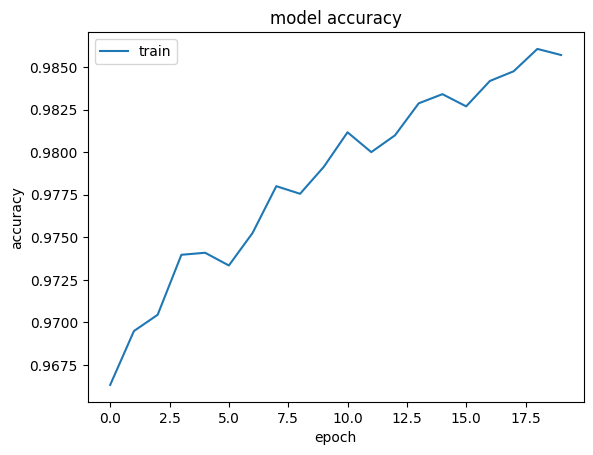

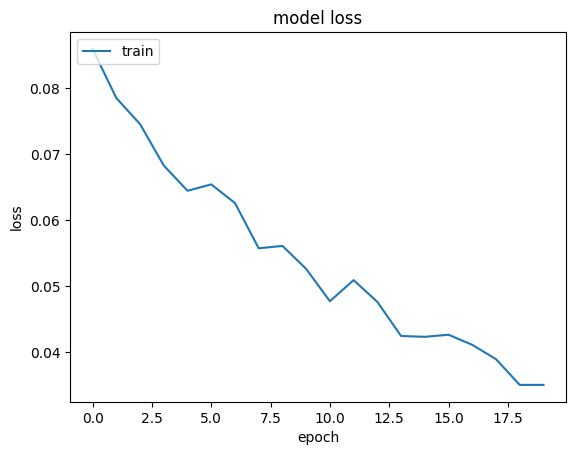

In [23]:
#Plot accuracy and loss graph that happended in the training phase
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [40]:
#Perform Sentiment Analysis (assuming it's a tweet)
twt = input("Enter Tweet: \n")

Enter Tweet: 
it's fine


In [41]:
#Tokenise the tweet
twt = tokenizer.texts_to_sequences(twt)
#Pad the tweet
twt = tf.keras.preprocessing.sequence.pad_sequences(twt, maxlen=X.shape[1], dtype='int32', value=0)

In [42]:
#Predict the sentiment behind the tweet
sentiment = model.predict(twt, batch_size=1)[0]
print(sentiment)

if(np.argmax(sentiment) == 0):
    print(y_arr[0])
elif (np.argmax(sentiment) == 1):
    print(y_arr[1])

9/9 [==============================] - 0s 23ms/step
[0.57881474 0.42118523]
Negative
